# Library Used in Coding Assignment
#### Below code is for import all Python Packages
### Below Packges have imported & its purpose
##### (1) numpy - numerical python scripts, to store array, list and other data
##### (2) pandas - to stored dataframe for the visualization
##### (3) sklearn.linear_model - Scikit Learn's Linear Model to train and predict Linear Model
##### (4) sklearn.neighbors - Scikit Learn's K Nearest Neighbors Classifier to Clasify the Class of "0" & "1"
##### (5) sklearn.sns - Seaborn Package to draw BoxPlot, BarPlot


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #Please remove this line and implement your own CV
import seaborn as sns
%matplotlib inline
from IPython.display import Image 

# Function Name = "generate_center"
#### Below Function - "generate_center" is to generate the 20 Centers
#### The function takes the following inpurt and return the 20 2 dimensional array
###### (1) n = Number of Centers to generate. It will be 20
###### (2) mu1 = The mean against which 10 centers will be generated. It will be (0,1)
###### (3) mu2 = The mean against which 10 centers will be generated. It will be (1,0)
###### (4) sigma = The standard deviation against which the centers will be generated

#### The function generates the 20 centers, 10 centers from mean = (0,1) and other 10 center would be from the mean = (1,0) with standard devitation of 0.5. Both the center (10 each) needs to be appended and return back to the caller

#### The numpy function np.random.normal is used to generate the centers.
#### The function would be called from the caller with seed, so it would be consistently same accross multiple runs
#### Following formula is used to generate the 20 centers

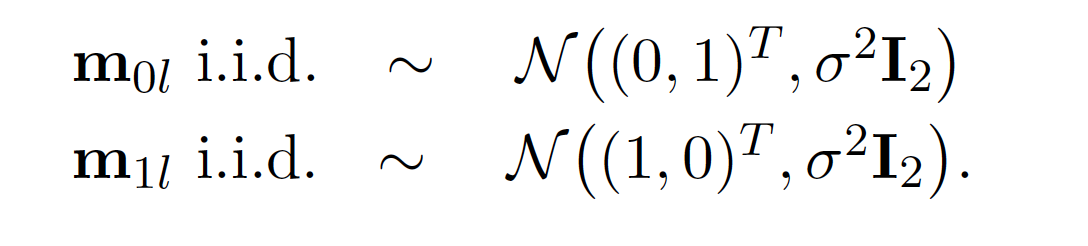

In [2]:
#Function is to generate the center 
def generate_center(n=20,mu1=(0,1),mu2=(1,0),sigma=0.5):
    center_1 = np.random.normal(size=(int(n/2),2),loc=mu1)
    center_2 = np.random.normal(size=(int(n/2),2),loc=mu2)
    center = np.vstack((center_1,center_2))
    return center

# Function Name = "generate_data"

### Below Function - "generate_data" is to generate data for training & test sets
##### The function takes the following inpurt and return the training & test data of 2 dimensions
###### (1) n = Number of Centers to generate. It will be 100 for training and 5000 for tests. As for each class we need to generate the data of this size
###### (2) center = Pass the entire 20 centers which is generated from the above function
###### (3) sigma = the standard deviation against which the training & test will be generated

#### The function takes a random number from the centers (1st 10 for the Class 0 and next 10 for the Class 1) and generates the trainning and test sets. For the training sets, 100 data will be generated with class 0 (from the random centers choose from the 1st 10 centers) and next 100 data will be generated with class 1 (from the random centers choose from the last 10 centers). Both the data vertically stacked and sends to the caller. The same will be done for the test sets, now instead of 100 each, it will be 5000 for the class 0 and next 5000 for the class 1.

#### Following is the formula to generate the mean however the mean would be used from the centers rather (0,1) or (1,0) 

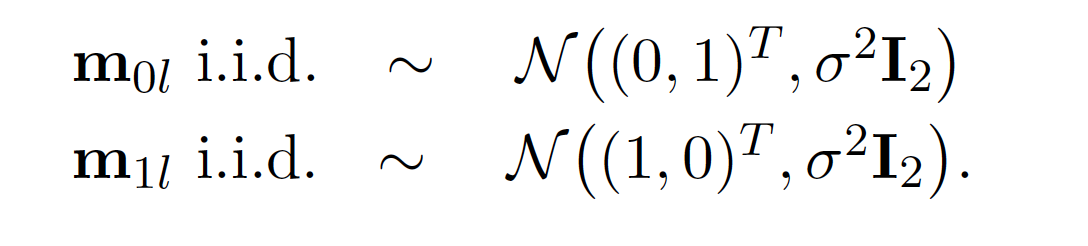

In [3]:
#Function to generate data 
def generate_data(n_size=100,center=[[0,1]],sigma=0.5):
    center_0_data = np.empty(shape=[1,0],dtype=int)
    center_1_data = np.empty(shape=[1,0],dtype=int)
    x_train = np.empty(shape=[0,2])
    y_train = np.empty(shape=[0,1],dtype=int)
    for num_sample in np.arange(n_size):
        rand_mu1 = np.random.randint(1,10) #Generate random number between 1 & 10 (mean = (0,1))
        rand_mu2 = np.random.randint(11,20) #Generate random number between 1 & 10 (mean = (1,0))
        center_0_data = np.append(center_0_data,rand_mu1) #Just to check how many random from which centers
        center_1_data = np.append(center_1_data,rand_mu2) #Just to check how many random from which centers
        center_mu1 = center[rand_mu1,:]
        center_mu2 = center[rand_mu2,:]
        #print ("Rand Mu1:{} Mu2:{} Center Mu1:{} Center Mu2:{}".format(rand_mu1,rand_mu2,center_mu1,center_mu2))
        x_train_class_0 = np.random.normal(loc=center_mu1,scale=sigma)
        x_train_class_1 = np.random.normal(loc=center_mu2,scale=sigma)
        y_train_class_0 = 0
        y_train_class_1 = 1
        x_train_ite = np.vstack((x_train_class_0,x_train_class_1))
        y_train_ite = np.append(y_train_class_0,y_train_class_1)
        x_train = np.vstack((x_train,x_train_ite))
        y_train = np.append(y_train,y_train_ite)
        
    return x_train,y_train#,center_0_data,center_1_data

# Function Name = plot_data
#### Below function"plot_data" is created to draw the training / test sets along X & Y axis
#### The function also draws the point as a "+" in the center for the Class 0 and Class 1

In [4]:
def plot_data(x_train,mu1=(0,1),mu2=(1,0)):
    n = int(x_train.shape[0]/2)
    plt.figure(figsize=(8,6))
    plt.scatter(x_train[:n,0],x_train[:n,1],label = "Class 0",alpha = 0.3)
    plt.scatter(x_train[n:,0],x_train[n:,1],label = "Class 1",alpha = 0.3)
    plt.scatter(mu1[0],mu1[1],marker="+",color="blue",s=200)
    plt.scatter(mu2[0],mu2[1],marker="+",color="red",s=200)
    plt.legend()
    plt.show()

# Function Name = "train_linear_model"
##### The function "train_linea_model" train the linear regression model against the input data, has the following parameter
### The Linear Regression is used from the Scikit Learn's Linear Regression 
###### (1) x_train # Feature set data. In our case, it's 2 dimensional array
###### (2) y_train # Target data. In our case, it's only Class 0 and Class 1

##### The Function finally returns the Linear Model (lin_reg) to the Callers

In [5]:
def train_linear_model(x_train,y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train,y_train)
    return lin_reg

# Function Name = "linear_model_predict"

#### Function used to predict the output data for the Linear Model 
#### The Output is binary (either "0" or "1"), based on the following
###### (1) if the value of y > 0.5, then the output is 1 or else 0

In [6]:
def linear_model_predict(data,model):
    y_predict_val = lin_reg.predict(data)
    y_pred = [1 if i >= 0.5 else 0 for i in y_predict_val]
    return y_pred

# Function Name = "bayes_predict"
#### The Function is used to predict usinng bayes function.
#### The output from the bayes is binary (either "0" or "1"), and based on the following
##### (1) True If the value of y > 0 , or else False

In [7]:
def bayes_predict(data, mu1=(0,1),mu2=(1,0)):
    bayes_val = 2*np.dot(data, np.subtract(mu2, mu1)) - (np.dot(mu2, mu2) - np.dot(mu1, mu2))
    bayes_pred = [i > 0 for i in bayes_val]
    return bayes_pred

# Function Name = "error_calc"
#### This function calculate the error for all model (Linear, Quadratic, Knn), which takes the following and gives out the error
#####  (1) The True value from the Training / Test sets (where all the value will be  0 or 1)
##### (2) The predicted value from the Training / Test Sets

In [8]:
def error_calc(y_true,y_predict):
    n = pd.Series(y_predict).shape[0]
    error_val = np.sum(y_true != y_predict)/n
    return error_val

# Function Name = "plot_bargraph_best_k"
##### The Function plots the best value of K (from 1 till 180) against each iteration (20 iteration).
##### The plot is to show which K value is the best which has the lowest error against each iteration

In [9]:
def plot_bargraph_best_k(data):
    fig,ax = plt.subplots()
    fig.set_size_inches(18.5,10)
    sns.barplot(x=np.arange(data.shape[0])+1,y="Best_K",data=data)
    ax.set_title("Best K Value in each Iteration (20) based on 10 Fold CV")

# Function Name = "plot_boxplot"
#### The boxplot shows the error it draws from the Train / Test for all the following models in one go
###### (1) Linear 
###### (2) Quadratic
###### (3) Bayes Error
###### (4) Knn 

##### The function tooks the data which contains the errors (train & test) for all the model for all the iteration (Iteration = 20) to plot the boxplot

In [10]:
def plot_boxplot(data):
    fig,ax = plt.subplots()
    fig.set_size_inches(18.5,10)
    sns.boxplot(x='Model',y='Error',hue='Train_Test',data=data,palette="Set3")
    ax.set_title("Box Plot for the Model's Error")

# Define & set all the variables

In [11]:
#Set the Seed to have consistent output for all Runs
random_seed = 665462521
np.random.seed(random_seed)
num_iteration = 20
num_center = 20
k = np.arange(1,181) # Number of K for KNearestNeighbors
knn_error = np.zeros([20,2])
lin_error = np.zeros([20,2])
bayes_lin_error = np.zeros([20,2])
lin_quad_error = np.zeros([20,2])
bayes_lin_quad_error = np.zeros([20,2])
best_k_iter = np.empty(shape=[0,1],dtype=int)
print_ind = True

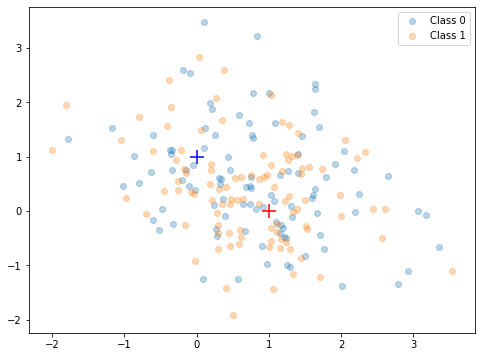

NameError: name 'error_cal' is not defined

In [12]:
#Generate the 20 Centers
center = generate_center(num_center)

#Loop through the 20 iterations to generate 20 Train / Test Samples & Fit -> Predict 
for i in np.arange(num_iteration):
    #Generate the Train & Test Data based on the Center
    x_train,y_train = generate_data(n_size=100,center=center)
    x_test,y_test = generate_data(n_size=5000,center=center)

    #Plot Train Data
    if (print_ind):
        plot_data(x_train)

    #Generate the Quadratic Feature
    x_train_qudratic = np.hstack((x_train,(x_train[:,0]**2).reshape(x_train.shape[0],1),(x_train[:,1]**2).reshape(x_train.shape[0],1),(x_train[:,0]*x_train[:,1]).reshape(x_train.shape[0],1)))
    x_test_quadratic = np.hstack((x_test,(x_test[:,0]**2).reshape(x_test.shape[0],1),(x_test[:,1]**2).reshape(x_test.shape[0],1),(x_test[:,0]*x_test[:,1]).reshape(x_test.shape[0],1)))
    

    #Linear Regression Prediction (Non Quadrtic)
    lin_reg = train_linear_model(x_train,y_train)
    y_train_pred = linear_model_predict(data=x_train,model = lin_reg)
    y_test_pred = linear_model_predict(data=x_test,model = lin_reg)
    lin_error_train = error_calc(y_train,y_train_pred)
    lin_error_test = error_calc(y_test,y_test_pred)
    lin_error[i,0] = lin_error_train
    lin_error[i,1] = lin_error_test
    
    #Bayes Prediction (Non Quadratic)
    y_train_pred = bayes_predict(data=x_train)
    y_test_pred = bayes_predict(data=x_test)
    bayes_error_train = error_calc(y_train,y_train_pred)
    bayes_error_test = error_calc(y_test,y_test_pred)
    bayes_lin_error[i,0] = bayes_error_train
    bayes_lin_error[i,1] = bayes_error_test
        
    #Linear Regression Prediction (Quadratic)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_qudratic,y_train)
    y_train_pred = linear_model_predict(data=x_train_qudratic,model = lin_reg)
    y_test_pred = linear_model_predict(data=x_test_quadratic,model = lin_reg)
    lin_quad_error_train = error_calc(y_train,y_train_pred)
    lin_quad_error_test = error_calc(y_test,y_test_pred)
    lin_quad_error[i,0] = lin_quad_error_train
    lin_quad_error[i,1] = lin_quad_error_test
    
    #K Nearest Neighbors
    knn_error_for_k = np.zeros(k.shape[0])
    for val in k:
        x_train_train,x_train_val,y_train_train,y_train_val = train_test_split(x_train,y_train,test_size=0.10,random_state = random_seed)
        knn = KNeighborsClassifier(n_neighbors=val)
        knn.fit(x_train_train,y_train_train)
        y_train_predict = knn.predict(x_train_val)
        
        error_for_k = error_calc(y_train_val,y_train_predict)
        knn_error_for_k[val-1] = error_for_k
    
    best_k = np.argmin(knn_error_for_k)+1
    best_k_iter = np.append(best_k_iter,best_k)
    
    #Train, Predict the Training & Test set for the Best K Value
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(x_train,y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    knn_error_train = error_calc(y_train,y_train_pred)
    knn_error_test = error_calc(y_test,y_test_pred)
    knn_error[i,0] = knn_error_train
    knn_error[i,1] = knn_error_test
    
    
    if (False):
        print ("Error for K: {}".format(knn_error_for_k))
        print ("Value Counts: {}".format(pd.Series(knn_error_for_k).value_counts()))
        print ("K: {}".format(np.argmin(knn_error_for_k)+1))
        print ("Minimim Error: {}".format(knn_error_for_k[np.argmin(knn_error_for_k)]))

    if (print_ind):
        print ("Iteration : {} Linear    : Train : {} : Test: {}".format(i,lin_error_train,lin_error_test))
        print ("Iteration : {} Bayes     : Train : {} : Test: {}".format(i,bayes_error_train,bayes_error_test))
        print ("Iteration : {} Quadratic : Train : {} : Test: {}".format(i,lin_quad_error_train,lin_quad_error_test))
        print ("Iteration : {} KNN       : Train : {} : Test: {}".format(i,knn_error_train,knn_error_test))
        print ("Iteration : {} Best K    : {}  CV Error for Best K: {}".format(i,np.argmin(knn_error_for_k)+1,knn_error_for_k[np.argmin(knn_error_for_k)]))


df_model_error = pd.DataFrame({'Model': np.concatenate((['Linear']*40,['Quadratic']*40,['Bayes']*40,['Knn']*40)),
              'Train_Test': np.concatenate((['Train']*20,['Test']*20,['Train']*20,['Test']*20,['Train']*20,['Test']*20,['Train']*20,['Test']*20)),
              'Error': np.concatenate((lin_error[:,0],lin_error[:,1],lin_quad_error[:,0],lin_quad_error[:,1],bayes_lin_error[:,0],bayes_lin_error[:,1],knn_error[:,0],knn_error[:,1]))
             })

df_best_k = pd.DataFrame(best_k_iter,columns = ['Best_K'])

# Draw the Bar Graph for the Best K for 20 Iteration

In [ ]:
plot_bargraph_best_k(data=df_best_k)

# Draw the Box Plot for all the Model's Error (Train & Test)

In [ ]:
plot_boxplot(data=df_model_error)